<a href="https://colab.research.google.com/github/MustafaAlperenYILDIRIM/Urban-Sounds-Classification/blob/main/Urban_Sounds_Classification_Preprocess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request
import numpy as np
import os
from tqdm import tqdm
from librosa import display
import librosa
import tensorflow as tf
from google.colab import files

In [3]:
urllib.request.urlretrieve ("https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz","UrbanSound8K.tar.gz")
tar = tarfile.open("UrbanSound8K.tar.gz")#https://goo.gl/8hY5ER
tar.extractall()
tar.close()

In [4]:
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
data.head(3)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing


In [5]:
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [6]:
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=36)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=876
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=438
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=219
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=110
  n_fft, y.shape[-1]


((36, 14), (36, 14), (36, 14), (36, 14), (36, 14))

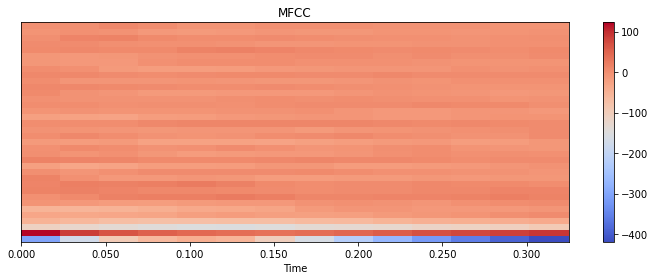

In [7]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

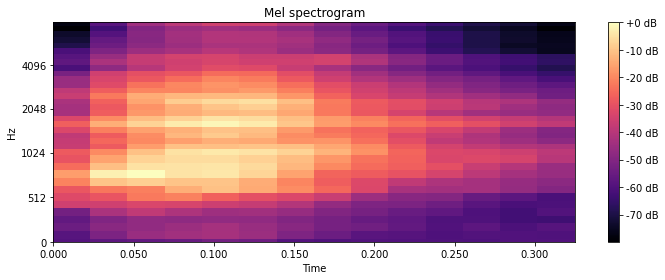

In [8]:
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

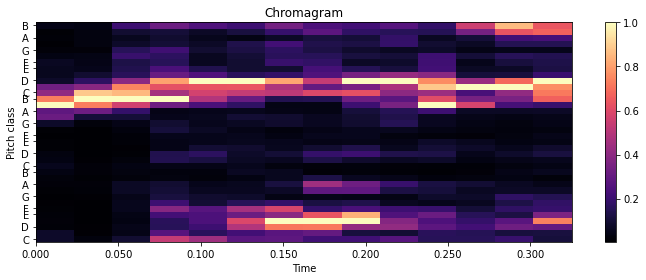

In [9]:
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

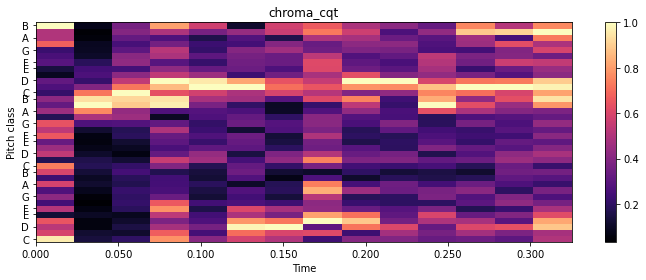

In [10]:
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

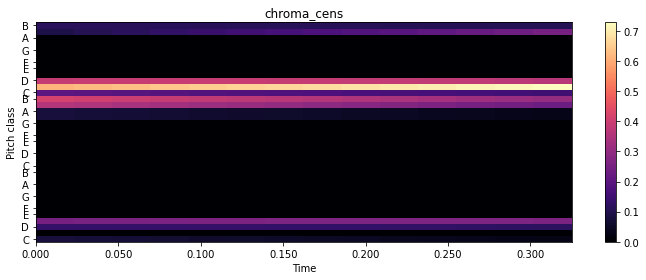

In [11]:
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [12]:
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36,), (36,), (36,), (36,), (36,))

In [13]:
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape

(36, 5)

In [14]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

 41%|████      | 3555/8732 [13:24<19:06,  4.52it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
 95%|█████████▌| 8325/8732 [30:13<00:57,  7.09it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
100%|██████████| 8732/8732 [31:30<00:00,  4.62it/s]


In [20]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|          | 9/8732 [00:06<1:55:41,  1.26it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=894
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=447
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=224
  n_fft, y.shape[-1]
  0%|          | 10/8732 [00:07<1:37:23,  1.49it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=724
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=362
  n_fft, y.shape[-1]
  0%|          | 11/8732 [00:07<1:27:14,  1.67it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectr

In [21]:
len(x_train)+len(x_test)

8732

In [22]:
len(data)

8732

In [25]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 36, 5), (837, 36, 5), (7895,), (837,))

In [35]:
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 180), (837, 180))

In [36]:
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [37]:
files.download("train_data.csv")
files.download("test_data.csv")
files.download("train_labels.csv")
files.download("test_labels.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>